In [7]:
import dask.dataframe as dd 
import numpy as np
from sklearn.preprocessing import LabelEncoder,RobustScaler,StandardScaler
import seaborn as sns
import featuretools as ft
from dask.distributed import Client
from sklearn.metrics import f1_score, confusion_matrix, classification_report,accuracy_score,roc_auc_score,recall_score
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from category_encoders import TargetEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from utils import *
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=dd.read_csv("data_clean.csv").compute()

In [3]:
X=data.drop(['TARGET'],axis=1)
y=data['TARGET']

In [4]:
ss=StandardScaler()
X=ss.fit_transform(X)

In [5]:
X_train, X_test, y_train ,y_test =train_test_split(X,y,test_size=0.2,random_state=2)

In [6]:
def evaluationClassification(model):
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("accuracy : ",round(accuracy_score(y_test, y_pred),3))
    a,b,threshold=roc_curve(y_test,model.predict_proba(X_test)[:,1])
    auc_pred=auc(a,b)
    print("roc_auc_score : ",round(roc_auc_score(y_test, model.predict_proba(X_test)[:,1]),3))
    print("recall score : " ,round(recall_score(y_test, y_pred),3))
    print("f1 score : " ,round(f1_score(y_test, y_pred),3))
    plt.title('ROC curve')
    plt.plot(a,b)
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid(True)
    plt.legend()
    plt.show()

              precision    recall  f1-score   support

           0       0.95      0.86      0.90     56550
           1       0.23      0.46      0.31      4953

    accuracy                           0.83     61503
   macro avg       0.59      0.66      0.61     61503
weighted avg       0.89      0.83      0.86     61503

[[48805  7745]
 [ 2651  2302]]
accuracy :  0.831
roc_auc_score :  0.756
recall score :  0.465
f1 score :  0.307


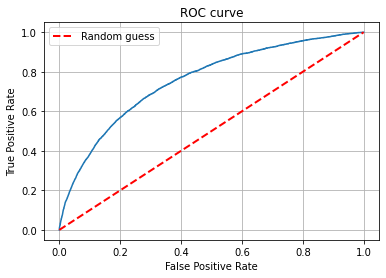

In [8]:
import xgboost as xgb
evaluationClassification(xgb.XGBClassifier(
objective="binary:logistic",
 scale_pos_weight=8,
 eval_metric="auc",
 max_depth=7
))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89     56550
           1       0.22      0.54      0.32      4953

    accuracy                           0.81     61503
   macro avg       0.59      0.69      0.60     61503
weighted avg       0.90      0.81      0.85     61503

[[47387  9163]
 [ 2295  2658]]
accuracy :  0.814
roc_auc_score :  0.774
recall score :  0.537
f1 score :  0.317


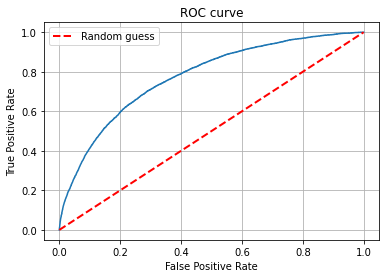

In [10]:
evaluationClassification(xgb.XGBClassifier(
    objective="binary:logistic",
    scale_pos_weight=8,
    eval_metric="auc",
    max_depth=7,
    min_child_weight=14,
    gamma=0.4,
    learning_rate=0.07,
    lambda_l1=0.4,
))